# astroLuSt

In [1]:
import astroLuSt as al

## Time_stuff

In [5]:
import time     #just loaded to simulate a task running

#create tasks
task = al.Time_stuff("some task")
task2 = al.Time_stuff("another task")

#time running-time of two intertwined tasks
task.start_task()
time.sleep(2)   #run some task
task2.start_task()
time.sleep(3)   #run some other task
task.end_task()
task2.end_task()


--> Started some task at time 2021-10-20 08:48:27.982265
--> Started another task at time 2021-10-20 08:48:29.984731
--> Time needed for some task: 0:00:05.004966
--> Finished some task at time 2021-10-20 08:48:32.987231
--> Time needed for another task: 0:00:03.002500
--> Finished another task at time 2021-10-20 08:48:32.987231


## Table_LuSt

Create Table_LuSt object and populate with a header and two rows

In [1]:
import astroLuSt as al
header = ["C1", "C2", "C3", "C4"]
separators = ["||", "|", "|", "|"]
alignments = ["l", "c", "c", "r"]
row1 = ["t11", 246, 2.45, 1E6]
row2 = ["t21", 1, 26.45, 1.2E-3]
row12 = [row1, row2]
fstring12 = 2*[["%10s", "%8d", "%8.3f", "%12.1e"]]    #formatstrings for row1 and row2
newsects = [False, "-"]
row3 = ["t31", 42, 1.1, 5.76]
fstring3 = ["%10s", "%8d", "%8.1e", "%12.2f"]
table = al.Table_LuSt(header=header,
                      rows=row12,
                      formatstrings=fstring12,
                      separators=separators,
                      newsections=newsects,
                      alignments=alignments)
# table.header = header   #use to change/set a header

print(table)            #prints out table objects and its attributes
table.print_table()     #prints out table including separator
print("")
table.add_row(row=row3, fstring=fstring3, new_sect="=")
table.print_table()
print("")
table.print_header()    #prints out header
table.print_rows()      #prints out rows
print("")
print(table)            #prints out table objects and its attributes
# table.latex_template()


Table_LuSt(
rows = [['t11', 246, 2.45, 1000000.0], ['t21', 1, 26.45, 0.0012]],
header = ['C1', 'C2', 'C3', 'C4'],
formatstrings = [['%10s', '%8d', '%8.3f', '%12.1e'], ['%10s', '%8d', '%8.3f', '%12.1e']]),
separators = ['||', '|', '|', '|'],
newsections = [False, '-'],
alignments = ['l', 'c', 'c', 'r']
 # ||C1        |   C2   |   C3   |          C4
 1 ||t11       |  246   | 2.450  |     1.0e+06
----------------------------------------------
 2 ||t21       |   1    | 26.450 |     1.2e-03
----------------------------------------------

 # ||C1        |   C2   |   C3   |          C4
 1 ||t11       |  246   | 2.450  |     1.0e+06
----------------------------------------------
 2 ||t21       |   1    | 26.450 |     1.2e-03
 3 ||t31       |   42   |1.1e+00 |        5.76
----------------------------------------------

 # ||C1        |   C2   |   C3   |          C4
 1 ||t11       |  246   | 2.450  |     1.0e+06
----------------------------------------------
 2 ||t21       |   1    | 26.450 |  

Add another row with corresponding formatstrings


In [5]:
row3 = ["t31", 4, 2.45, 8.2E-2]
fstring3 = ["%10s", "%8d", "%8.2f", "%12.1e"]        #formatstring for row3

table.add_row(row3, fstring=fstring3)
# print(table)

table.print_table(save=False)                         #only prints table (no saveing)
# table.print_table(save="test.txt")                  #saves table into "test.txt" in addition to printing it


 # ||C1        |   C2   |   C3   |          C4
 1 ||t11       |  246   | 2.450  |     1.0e+06
----------------------------------------------
 2 ||t21       |   1    | 26.450 |     1.2e-03
 3 ||t31       |   42   |1.1e+00 |        5.76
 4 ||t31       |   4    |  2.45  |     8.2e-02
 5 ||t31       |   4    |  2.45  |     8.2e-02
 6 ||t31       |   4    |  2.45  |     8.2e-02
 7 ||t31       |   4    |  2.45  |     8.2e-02
----------------------------------------------


Add another row without formatstring set.
This will set the formatstring automatically to the one of the last current entries.

In [3]:
row4 = ["t41", 8, 82.45, 1.2E-2]

table.add_row(row4)

table.print_table()


 # ||C1        |   C2   |   C3   |          C4
 1 ||t11       |  246   | 2.450  |     1.0e+06
----------------------------------------------
 2 ||t21       |   1    | 26.450 |     1.2e-03
 3 ||t31       |   42   |1.1e+00 |   5.76
 4 ||t31       |   4    | 2.45 |8.2e-02
 5 ||t41       |   8    | 82.450 |     1.2e-02
----------------------------------------------


## plot_ax

In [3]:
import numpy as np
import matplotlib.pyplot as plt

xi = np.linspace(0,20,21)

#subplot1
xvals_sp1 = [xi,xi]
yvals_sp1 = [xi,xi**2]
colors_sp1 = ["r","g"]
markers_sp1 = [".","x"]
markersizes_sp1 = [50,2]
labels_sp1 = ["c1", "c2"]
linestyles_sp1 = ["","-."]
alphas_sp1 = [0.5,1]
smooths_sp1 = [False, True]
smoothdegrees_sp1 = [3,3]
smoothresolutions_sp1 = [100,4]
xerrs_sp1 = [[0.5]*len(xi), [1]*len(xi)]
yerrs_sp1 = [[0.5]*len(xi), [1]*len(xi)]
capsizes_sp1 = [3,5]
errcolors_sp1 = ["r","g"]
position_sp1 = 211
zorders_sp1 = [1,2]
invert_yaxis_sp1 = True
invert_xaxis_sp1 = False
xaxlab_sp1 = "x1"
yaxlab_sp1 = "y1"

#subplot2
xvals_sp2 = [xi]
yvals_sp2 = [xi*3]
colors_sp2 = ["r"]
markers_sp2 = [","]
markersizes_sp2 = [12]
labels_sp2 = ["c1"]
linestyles_sp2 = ["-"]
alphas_sp2 = [1]
smooths_sp2 = [True]
smoothdegrees_sp2 = [3]
smoothresolutions_sp2 = [4]
xerrs_sp2 = [[2]*len(xi)]
yerrs_sp2 = [[2]*len(xi)]
capsizes_sp2 = [3]
errcolors_sp2 = ["b"]
position_sp2 = 224
zorders_sp2 = [1]
invert_yaxis_sp2 = False
invert_xaxis_sp2 = True
xaxlab_sp2 = "x2"
yaxlab_sp2 = "y2"

#subplot3
xvals_sp3 = [xi]
yvals_sp3 = [xi]
colors_sp3 = ["k"]
markers_sp3 = ["^"]
markersizes_sp3 = [8]
labels_sp3 = ["c2"]
linestyles_sp3 = [":"]
alphas_sp3 = [1]
smooths_sp3 = [True]
smoothdegrees_sp3 = [2]
smoothresolutions_sp3 = [300]
xerrs_sp3 = [None]
yerrs_sp3 = [None]
capsizes_sp3 = [None]
errcolors_sp3 = ["c"]
position_sp3 = 223
zorders_sp3 = [1]
invert_yaxis_sp3 = False
invert_xaxis_sp3 = False
xaxlab_sp3 = "y3"
yaxlab_sp3 = "x3"

#define variables for each subplot/graph
xvals = [xvals_sp1, xvals_sp2, xvals_sp3]
yvals = [yvals_sp1, yvals_sp2, yvals_sp3]
colors= [colors_sp1, colors_sp2, colors_sp3]
markers = [markers_sp1, markers_sp2, markers_sp3]
markersizes = [markersizes_sp1, markersizes_sp2, markersizes_sp3]
labels = [labels_sp1, labels_sp2, labels_sp3] 
linestyles = [linestyles_sp1, linestyles_sp2, linestyles_sp3] 
alphas = [alphas_sp1, alphas_sp2, alphas_sp3] 
smooths = [smooths_sp1, smooths_sp2, smooths_sp3] 
smoothdegrees = [smoothdegrees_sp1, smoothdegrees_sp2, smoothdegrees_sp3] 
smoothresolutions = [smoothresolutions_sp1, smoothresolutions_sp2, smoothresolutions_sp3] 
xerrs = [xerrs_sp1, xerrs_sp2, xerrs_sp3] 
yerrs = [yerrs_sp1, yerrs_sp2, yerrs_sp3] 
capsizes = [capsizes_sp1, capsizes_sp2, capsizes_sp3] 
errcolors = [errcolors_sp1, errcolors_sp2, errcolors_sp3] 
positions = [position_sp1, position_sp2, position_sp3]
zorders = [zorders_sp1, zorders_sp2, zorders_sp3] 
invert_xaxis = [invert_xaxis_sp1, invert_xaxis_sp2, invert_xaxis_sp3]
invert_yaxis = [invert_yaxis_sp1, invert_yaxis_sp2, invert_yaxis_sp3]
xaxlabs = [xaxlab_sp1, xaxlab_sp2, xaxlab_sp3] 
yaxlabs = [yaxlab_sp1, yaxlab_sp2, yaxlab_sp3] 

suptitle="Testtitle"
num = "Testplot"

figlegend = True
figsize = (5,5)
fontsize = 16

fig, axs = al.plot_ax(xvals, yvals, colors=colors, markers=markers, markersizes=markersizes, labels=labels, linestyles=linestyles, alphas=alphas,
                    smooths=smooths, smoothdegrees=smoothdegrees, smoothresolutions=smoothresolutions,
                    xerrs=xerrs, yerrs=yerrs, capsizes=capsizes, errcolors=errcolors,
                    positions=positions, zorders=zorders,
                    invert_yaxis=invert_yaxis, invert_xaxis=invert_xaxis,
                    xlabs=xaxlabs, ylabs=yaxlabs, suptitle=suptitle, num=num,
                    figlegend=figlegend, figsize=figsize, fontsize=fontsize,
                    timeit=True)
#use to share axis
axs[1].get_shared_y_axes().join(axs[1],axs[2])
axs[1].set_yticklabels([])
plt.tight_layout()
plt.show()


--> Started plot_ax at time 2021-10-20 09:49:28.776314

---------------------------------------
position: 211, curve number: 1
The errors attached to this curve will
be deleted for the plotting process!
---------------------------------------


---------------------------------------
position: 224, curve number: 0
The errors attached to this curve will
be deleted for the plotting process!
---------------------------------------


---------------------------------------
position: 223, curve number: 0
The errors attached to this curve will
be deleted for the plotting process!
---------------------------------------

--> Time needed for plot_ax: 0:00:00.420112
--> Finished plot_ax at time 2021-10-20 09:49:29.196426


## hexcolor_extract

--> Started hexcolor_extract at time 2021-10-20 09:54:09.810563


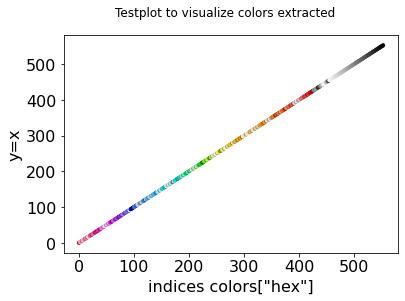

--> Time needed for hexcolor_extract: 0:00:00.567753
--> Finished hexcolor_extract at time 2021-10-20 09:54:10.378316


In [3]:
color = al.hexcolor_extract(testplot=True, timeit=True)